### **Описание датасета**

- **Предметная область:** Химический анализ красных вин и оценка их качества
- **Источник данных:** UCI Machine Learning Repository - реальные данные о винах Vinho Verde
- **Характер данных:** Реальные данные
- **Описание задачи:** Прогнозирование качества вина по химическим показателям

### **Описание атрибутов**

- **fixed acidity** - числовой - фиксированная кислотность (г/л винной кислоты)
- **volatile acidity** - числовой - летучая кислотность (г/л уксусной кислоты)
- **citric acid** - числовой - содержание лимонной кислоты (г/л)
- **residual sugar** - числовой - остаточный сахар (г/л)
- **chlorides** - числовой - содержание хлоридов (г/л хлорида натрия)
- **free sulfur dioxide** - числовой - свободный диоксид серы (мг/л)
- **total sulfur dioxide** - числовой - общий диоксид серы (мг/л)
- **density** - числовой - плотность (г/мл)
- **pH** - числовой - уровень кислотности
- **sulphates** - числовой - содержание сульфатов (г/л сульфата калия)
- **alcohol** - числовой - содержание алкоголя (% об.)
- **quality** - числовой - качество вина (шкала от 0 до 10)

### **Ход работы:**

#### **Импорт библиотек и загрузка датасета**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10


path = "/Users/yulia/Desktop/вуз/winequality-red.csv"

with open(path, 'r') as f:
    first_lines = [f.readline().strip() for _ in range(5)]

print("Первые строки файла:")
for i, line in enumerate(first_lines):
    print(f"{i}: {line}")


first_line = first_lines[0]
df = pd.read_csv(path, sep=',')


print("\nПервые 5 строк датасета:")
print(df.head())


print(f"\nФинальный размер датасета: {df.shape}")



target_column = 'quality'
print(f"Целевая переменная: '{target_column}'")

feature_columns = [col for col in df.columns if col != target_column]
print(f"Признаки {len(feature_columns)} столбцов")


Первые строки файла:
0: fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1: 7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2: 7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3: 7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4: 11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6

Первые 5 строк датасета:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0    


Анализ fixed acidity

   • Среднее значение: 8.3196
   • Среднеквадратичное отклонение: 1.7411

Пропущенные значения:
   • Количество пропусков: 0
   • Процент пропусков: 0.00%
   • РЕКОМЕНДАЦИЯ: Обработка не требуется

Анализ volatile acidity

   • Среднее значение: 0.5278
   • Среднеквадратичное отклонение: 0.1791

Пропущенные значения:
   • Количество пропусков: 0
   • Процент пропусков: 0.00%
   • РЕКОМЕНДАЦИЯ: Обработка не требуется

Анализ citric acid

   • Среднее значение: 0.2710
   • Среднеквадратичное отклонение: 0.1948

Пропущенные значения:
   • Количество пропусков: 0
   • Процент пропусков: 0.00%
   • РЕКОМЕНДАЦИЯ: Обработка не требуется

Анализ residual sugar

   • Среднее значение: 2.5388
   • Среднеквадратичное отклонение: 1.4099

Пропущенные значения:
   • Количество пропусков: 0
   • Процент пропусков: 0.00%
   • РЕКОМЕНДАЦИЯ: Обработка не требуется

Анализ chlorides

   • Среднее значение: 0.0875
   • Среднеквадратичное отклонение: 0.0471

Пропущенные значения:
   

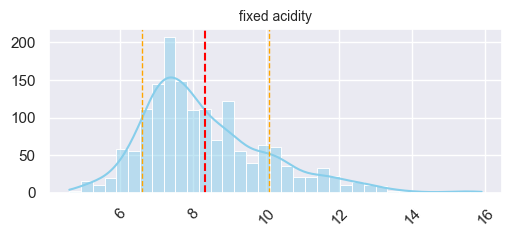

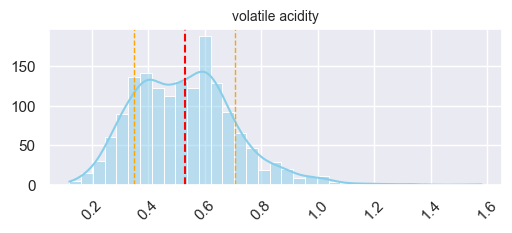

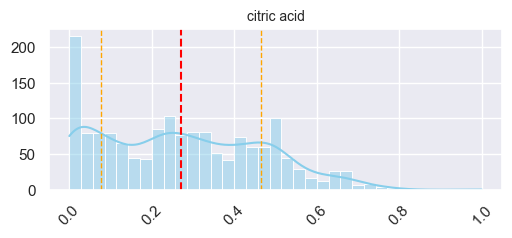

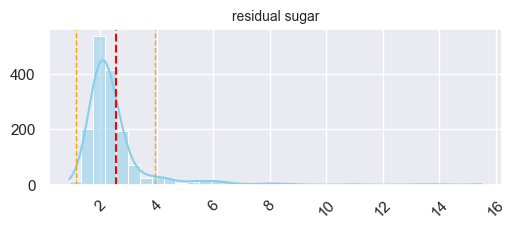

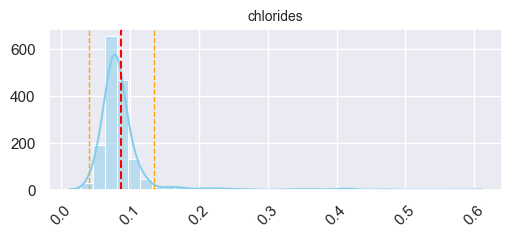

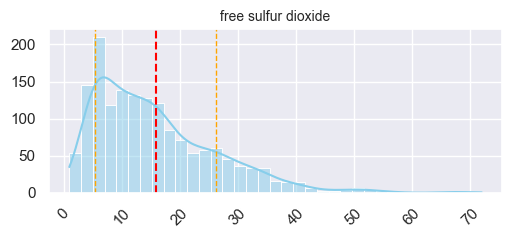

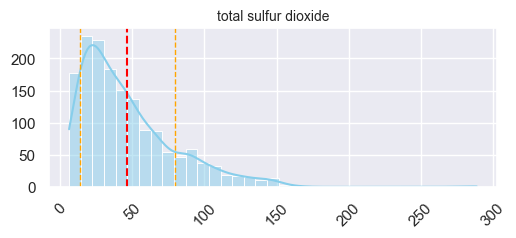

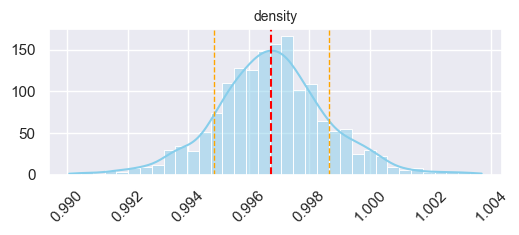

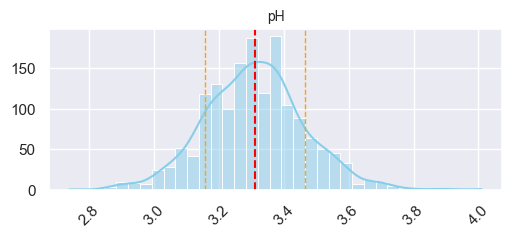

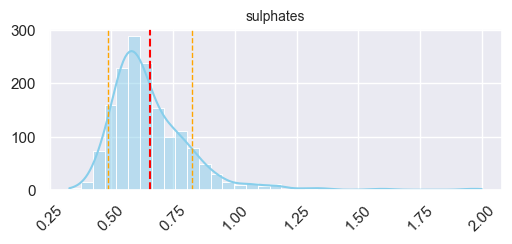

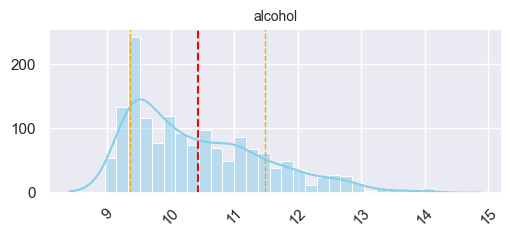

In [21]:
for feature in feature_columns:

    print(f"\nАнализ {feature}")

    values = df[feature]

    print(f"\n   • Среднее значение: {values.mean():.4f}")
    print(f"   • Среднеквадратичное отклонение: {values.std():.4f}")

    missing_count = values.isnull().sum()
    missing_percentage = (missing_count / len(values)) * 100
    print(f"\nПропущенные значения:")
    print(f"   • Количество пропусков: {missing_count}")
    print(f"   • Процент пропусков: {missing_percentage:.2f}%")

    if missing_count > 0:
        if missing_percentage < 5:
            print(f"   • РЕКОМЕНДАЦИЯ: Удалить строки с пропусками (мало пропусков)")
        elif missing_percentage < 20:
            print(f"   • РЕКОМЕНДАЦИЯ: Заполнить медианой/средним")
        else:
            print(f"   • РЕКОМЕНДАЦИЯ: Рассмотреть удаление признака (много пропусков)")
    else:
        print(f"   • РЕКОМЕНДАЦИЯ: Обработка не требуется")


    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 15))
    not_stat_cols = [2, 6, 9, 11, 12, 13, 14]

    plt.subplot(7, 2, i)



    sns.histplot(values, kde=True, bins=35, color='skyblue')

    mean_val = values.mean()
    std_val = values.std()

    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(mean_val + std_val, color='orange', linestyle='--', linewidth=1)
    plt.axvline(mean_val - std_val, color='orange', linestyle='--', linewidth=1)

    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

    plt.xticks(rotation=45)

    plt.tight_layout()

stats_df = pd.DataFrame({'Среднее': df.mean(numeric_only=True), 'Средне-квадратичное_Отклонение': df.std(numeric_only=True), 'Количество пропусков': df.isnull().sum(), 'Процент пропусков': (df.isnull().sum() / len(df)) * 100})

print(stats_df)


In [ ]:
for feature in feature_columns:

    values = df[feature]
    # 4. Анализ выбросов
    print(f"\n4. АНАЛИЗ ВЫБРОСОВ:")

    # Метод IQR
    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = values[(values < lower_bound) | (values > upper_bound)]
    outlier_percentage_iqr = (len(outliers_iqr) / len(values)) * 100

    print(f"   • Метод IQR:")
    print(f"     - Количество выбросов: {len(outliers_iqr)}")
    print(f"     - Процент выбросов: {outlier_percentage_iqr:.2f}%")
    print(f"     - Границы выбросов: [{lower_bound:.4f}, {upper_bound:.4f}]")

    # Метод Z-score
    try:
        z_scores = np.abs(stats.zscore(values))
        outliers_z = len(values[z_scores > 3])
        outlier_percentage_z = (outliers_z / len(values)) * 100

        print(f"   • Метод Z-score (>3σ):")
        print(f"     - Количество выбросов: {outliers_z}")
        print(f"     - Процент выбросов: {outlier_percentage_z:.2f}%")
    except:
        outliers_z = 0
        outlier_percentage_z = 0
        print(f"   • Метод Z-score: недоступен для этого признака")

    # Рекомендации по обработке выбросов
    print(f"\n   • РЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ ВЫБРОСОВ:")
    max_outlier_pct = max(outlier_percentage_iqr, outlier_percentage_z)
    if max_outlier_pct == 0:
        print(f"     - Выбросов нет, обработка не требуется")
    elif max_outlier_pct < 5:
        print(f"     - Немного выбросов, можно удалить")
    elif max_outlier_pct < 15:
        print(f"     - Умеренное количество выбросов, рекомендуется winsorization")
    else:
        print(f"     - Много выбросов, требуется тщательный анализ")





# =============================================================================
# 4. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
# =============================================================================

print("\n" + "="*50)
print("4. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("="*50)

# Вычисляем матрицу корреляций только для числовых столбцов
numeric_df = df.select_dtypes(include=[np.number])

print(f"Числовые столбцы для корреляционного анализа: {list(numeric_df.columns)}")

if len(numeric_df.columns) > 1:
    print("Вычисление матрицы корреляций...")
    correlation_matrix = numeric_df.corr()

    print("✓ Матрица корреляций вычислена успешно!")
    print(f"Размер матрицы: {correlation_matrix.shape}")

    # Визуализация матрицы корреляций
    print("\nВИЗУАЛИЗАЦИЯ МАТРИЦЫ КОРРЕЛЯЦИЙ:")
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, fmt='.2f', mask=mask,
                cbar_kws={"shrink": .8}, annot_kws={"size": 10})
    plt.title('МАТРИЦА КОРРЕЛЯЦИЙ ПИРСОНА МЕЖДУ ПРИЗНАКАМИ', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Анализ корреляций с целевой переменной
    if target_column in correlation_matrix.columns:
        print(f"\nАНАЛИЗ КОРРЕЛЯЦИЙ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ '{target_column}':")

        target_correlations = correlation_matrix[target_column].sort_values(ascending=False)
        target_correlations = target_correlations[target_correlations.index != target_column]

        print("\nВЫСОКАЯ ПОЛОЖИТЕЛЬНАЯ КОРРЕЛЯЦИЯ (r > 0.3):")
        high_positive = [(feat, corr) for feat, corr in target_correlations.items() if corr > 0.3]
        for feat, corr in high_positive:
            print(f"   • {feat}: {corr:.3f} (сильное положительное влияние)")

        print("\nУМЕРЕННАЯ ПОЛОЖИТЕЛЬНАЯ КОРРЕЛЯЦИЯ (0.1 < r ≤ 0.3):")
        moderate_positive = [(feat, corr) for feat, corr in target_correlations.items() if 0.1 < corr <= 0.3]
        for feat, corr in moderate_positive:
            print(f"   • {feat}: {corr:.3f} (умеренное положительное влияние)")

        print("\nСЛАБАЯ КОРРЕЛЯЦИЯ (-0.1 ≤ r ≤ 0.1):")
        weak_corr = [(feat, corr) for feat, corr in target_correlations.items() if -0.1 <= corr <= 0.1]
        for feat, corr in weak_corr:
            print(f"   • {feat}: {corr:.3f} (практически нет корреляции)")

        print("\nОТРИЦАТЕЛЬНАЯ КОРРЕЛЯЦИЯ (r < -0.1):")
        negative_corr = [(feat, corr) for feat, corr in target_correlations.items() if corr < -0.1]
        for feat, corr in negative_corr:
            strength = "сильное" if corr < -0.3 else "умеренное"
            print(f"   • {feat}: {corr:.3f} ({strength} отрицательное влияние)")

    # Анализ высоких корреляций между признаками
    print(f"\nАНАЛИЗ ВЫСОКОКОРРЕЛИРОВАННЫХ ПАР ПРИЗНАКОВ:")

    high_corr_pairs = []
    moderate_corr_pairs = []
    low_corr_pairs = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]

            # Исключаем пары с целевой переменной из этого анализа
            if target_column in correlation_matrix.columns and col1 != target_column and col2 != target_column:
                if abs(corr_value) > 0.7:
                    high_corr_pairs.append((col1, col2, corr_value))
                elif abs(corr_value) > 0.5:
                    moderate_corr_pairs.append((col1, col2, corr_value))
                elif abs(corr_value) < 0.1:
                    low_corr_pairs.append((col1, col2, corr_value))

    print(f"\nСИЛЬНО КОРРЕЛИРОВАННЫЕ ПАРЫ (|r| > 0.7):")
    if high_corr_pairs:
        high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
        for pair in high_corr_pairs:
            corr_type = "положительная" if pair[2] > 0 else "отрицательная"
            print(f"   • {pair[0]} - {pair[1]}: {pair[2]:.3f} (сильная {corr_type})")
    else:
        print("   Не найдено")

    print(f"\nУМЕРЕННО КОРРЕЛИРОВАННЫЕ ПАРЫ (0.5 < |r| ≤ 0.7):")
    if moderate_corr_pairs:
        moderate_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
        for pair in moderate_corr_pairs[:10]:  # покажем топ-10
            corr_type = "положительная" if pair[2] > 0 else "отрицательная"
            print(f"   • {pair[0]} - {pair[1]}: {pair[2]:.3f} (умеренная {corr_type})")
    else:
        print("   Не найдено")

    print(f"\nПАРЫ С ОЧЕНЬ НИЗКОЙ КОРРЕЛЯЦИЕЙ (|r| < 0.1):")
    if low_corr_pairs:
        low_corr_pairs.sort(key=lambda x: abs(x[2]))
        for pair in low_corr_pairs[:5]:  # покажем топ-5 самых низких
            corr_type = "положительная" if pair[2] > 0 else "отрицательная"
            print(f"   • {pair[0]} - {pair[1]}: {pair[2]:.3f} (очень слабая {corr_type})")
    else:
        print("   Не найдено")

    # Матрица графиков рассеивания
    print(f"\nМАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ:")

    # Выберем наиболее информативные признаки
    if target_column in correlation_matrix.columns and len(correlation_matrix.columns) > 4:
        # Берем 3 наиболее коррелированных с целевой переменной признака
        top_correlated = correlation_matrix[target_column].abs().sort_values(ascending=False)
        top_features = top_correlated.index[1:4].tolist()  # исключаем саму целевую

        print(f"Построение матрицы рассеивания для признаков: {top_features} + {target_column}")

        try:
            fig = sns.pairplot(df[top_features + [target_column]],
                               diag_kind='hist',
                               plot_kws={'alpha': 0.6, 's': 30},
                               diag_kws={'alpha': 0.7, 'bins': 20})
            fig.fig.suptitle(f'МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ\n(топ-3 признака по корреляции с {target_column})',
                             y=1.02, fontsize=16)
            plt.show()
        except Exception as e:
            print(f"Ошибка при построении матрицы рассеивания: {e}")

    # Дополнительные графики рассеивания с целевой переменной
    print(f"\nГРАФИКИ РАССЕИВАНИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")

    if target_column in correlation_matrix.columns:
        # Берем топ-4 наиболее коррелированных признака
        top_correlated = correlation_matrix[target_column].abs().sort_values(ascending=False)
        top_features = top_correlated.index[1:5].tolist()

        n_features = len(top_features)
        if n_features > 0:
            n_cols = 2
            n_rows = (n_features + n_cols - 1) // n_cols

            fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 6))
            if n_rows == 1:
                axes = [axes] if n_cols == 1 else axes
            else:
                axes = axes.ravel() if hasattr(axes, 'ravel') else axes

            for i, feature in enumerate(top_features):
                if i < len(axes):
                    axes[i].scatter(df[feature], df[target_column], alpha=0.6,
                                  c=df[target_column], cmap='viridis', s=50)
                    axes[i].set_xlabel(feature, fontsize=12)
                    axes[i].set_ylabel(target_column, fontsize=12)

                    # Линия тренда
                    z = np.polyfit(df[feature], df[target_column], 1)
                    p = np.poly1d(z)
                    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

                    corr = correlation_matrix.loc[feature, target_column]
                    axes[i].set_title(f'{feature} vs {target_column}\n(r = {corr:.3f})', fontsize=14)
                    axes[i].grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()
else:
    print("Недостаточно числовых столбцов для корреляционного анализа")

# =============================================================================
# 5. ВЫВОДЫ И РЕКОМЕНДАЦИИ
# =============================================================================

print("\n" + "="*80)
print("5. ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("="*80)


# Ключевые выводы
print(f"\nКЛЮЧЕВЫЕ ВЫВОДЫ:")

if 'correlation_matrix' in locals() and target_column in correlation_matrix.columns:
    # Самые важные признаки
    top_positive = correlation_matrix[target_column][correlation_matrix[target_column] > 0.2].sort_values(ascending=False)
    top_negative = correlation_matrix[target_column][correlation_matrix[target_column] < -0.2].sort_values()

    if len(top_positive) > 0:
        print(f"• Наиболее важные положительные факторы для {target_column}:")
        for feat, corr in top_positive.items():
            if feat != target_column:
                print(f"  - {feat} (r = {corr:.3f})")

    if len(top_negative) > 0:
        print(f"• Наиболее важные отрицательные факторы для {target_column}:")
        for feat, corr in top_negative.items():
            print(f"  - {feat} (r = {corr:.3f})")

analysis_results = """

РЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕЙ РАБОТЫ:

1. ПРЕДОБРАБОТКА ДАННЫХ:
   • Масштабирование числовых признаков (StandardScaler)
   • Обработка выбросов методами winsorization или robust scaling
   • Проверка на мультиколлинеарность и удаление сильно коррелированных признаков

2. МОДЕЛИРОВАНИЕ:
   • Для регрессии: Linear Regression, Random Forest, Gradient Boosting
   • Для классификации: Random Forest, XGBoost, SVM
   • Кросс-валидация для оценки качества моделей

3. ВАЛИДАЦИЯ:
   • Разделение на обучающую и тестовую выборки
   • Использование метрик: MAE, RMSE (регрессия) или Accuracy, F1-score (классификация)
   • Анализ остатков/ошибок модели
"""

print(analysis_results)

print("\n" + "="*80)
print("ЛАБОРАТОРНАЯ РАБОТА УСПЕШНО ЗАВЕРШЕНА!")
print("="*80)